In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_mall = pd.read_csv('Mall_Customers.csv')
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df_mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df_mall_train = df_mall[:160]
df_mall_test = df_mall[160:]

<AxesSubplot:>

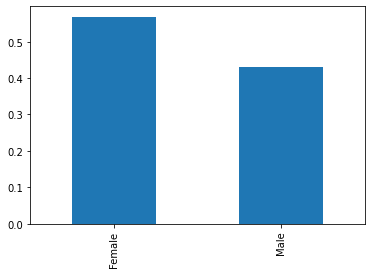

In [6]:
df_mall_train['Gender'].value_counts(normalize=True).plot(kind='bar')

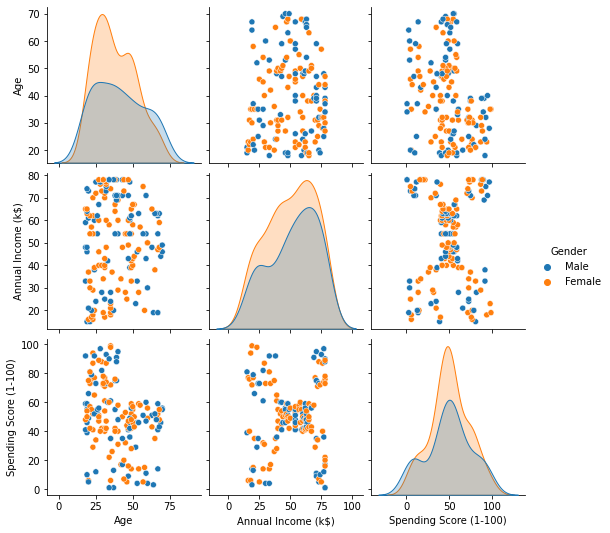

In [7]:
sns.pairplot(df_mall_train[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], hue='Gender')

In [27]:
from sklearn.cluster import KMeans

X = df_mall_train[['Annual Income (k$)', 'Spending Score (1-100)']].copy()

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [28]:
X['cluster_ix'] = pd.Series(kmeans.labels_)
X

,Annual Income (k$),Spending Score (1-100),cluster_ix
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3
...,...,...,...
155,78,89,2
156,78,1,1
157,78,78,2
158,78,1,1


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

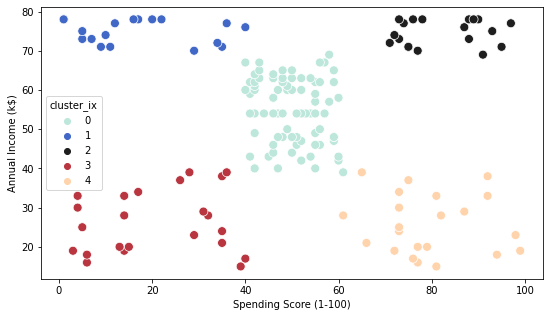

In [29]:
plt.figure(figsize=(9,5))
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=X, hue='cluster_ix', s=80, palette='icefire')

    Cluster 1: High income, low spending
    Cluster 2: High income, high spending
    Cluster 3: Mid income, mid spending
    Cluster 4: Low income, low spending
    Cluster 5: Low income, high spending

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

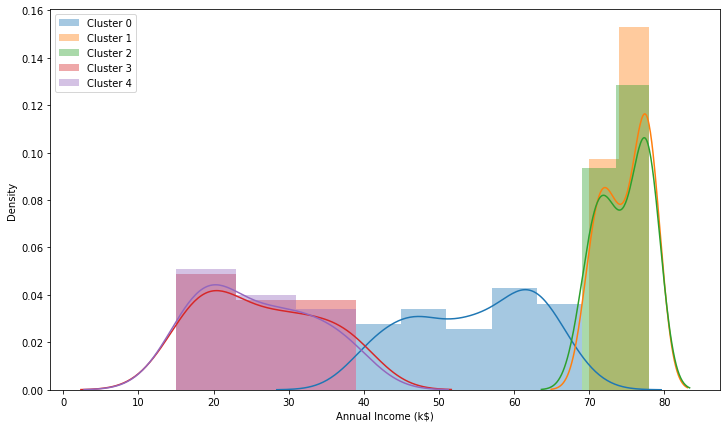

In [35]:
plt.figure(figsize=(12,7))
for ix in sorted(X['cluster_ix'].unique()):
    sns.distplot(X[X['cluster_ix'] == ix]['Annual Income (k$)'], label='Cluster {}'.format(ix))
plt.legend()

In [52]:
df_mall_train['Is Male'] = np.where(df_mall_train['Gender'] == 'Male', 1, 0)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
df_mall_train.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Is Male
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [55]:
n_clusters = range(2,10)

df_results = pd.DataFrame(columns=['k', 'inertia', 'score'])



for k in n_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_mall_train.drop(['CustomerID', 'Gender'], axis=1))
#     kmeans.fit(X.drop('cluster_ix', axis=1))
    
    df_results = df_results.append({
        'k': k,
        'inertia': kmeans.inertia_,
        'score': kmeans.score(df_mall_train.drop(['CustomerID', 'Gender'], axis=1))
    }, ignore_index=True)
    
df_results

,k,inertia,score
0,2.0,122170.125000,-122170.125000
1,3.0,95387.802784,-95387.802784
2,4.0,71375.727811,-71375.727811
3,5.0,49783.546670,-49783.546670
4,6.0,33271.565137,-33271.565137
5,7.0,29598.873056,-29598.873056
6,8.0,25977.273213,-25977.273213
7,9.0,23410.710991,-23410.710991


<AxesSubplot:xlabel='k', ylabel='inertia'>

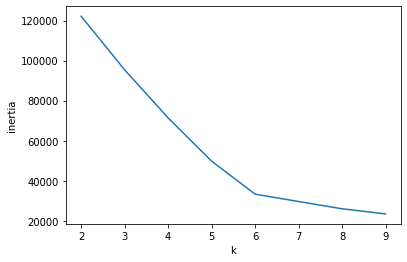

In [56]:
# elbow method
sns.lineplot(x='k', y='inertia', data=df_results)

<AxesSubplot:xlabel='k', ylabel='score'>

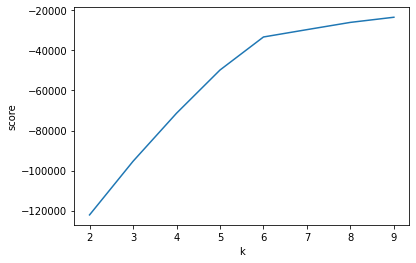

In [57]:
# silhouette score
sns.lineplot(x='k', y='score', data=df_results)

In [71]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=5)
agglomerative.fit(X.drop('cluster_ix', axis=1))

AgglomerativeClustering(n_clusters=5)

In [72]:
agglomerative.labels_

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 4, 3, 4, 3,
       0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3], dtype=int64)

In [73]:
X_agglo = X.copy()
X_agglo['agglo_cluster_ix'] = pd.Series(agglomerative.labels_)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

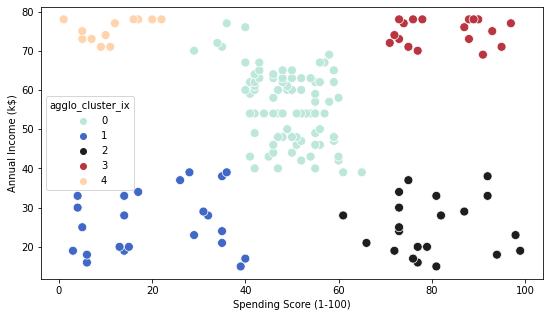

In [74]:
plt.figure(figsize=(9,5))
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=X_agglo, hue='agglo_cluster_ix', s=80, palette='icefire')

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

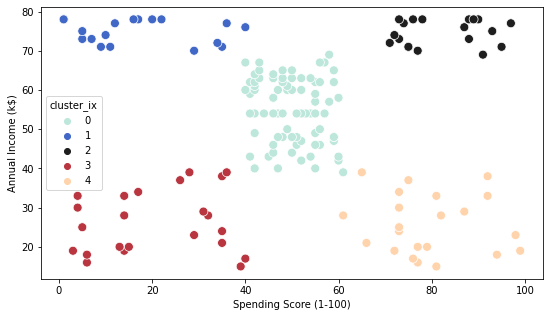

In [75]:
plt.figure(figsize=(9,5))
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=X, hue='cluster_ix', s=80, palette='icefire')

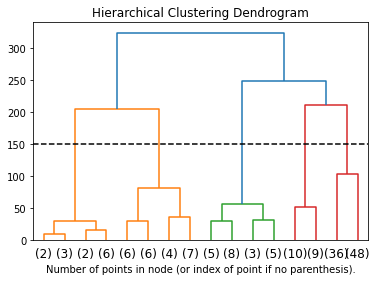

In [78]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X.drop('cluster_ix', axis=1))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.axhline(150, ls='--', color='black')
plt.show()

In [ ]:
# update yg bener pake ini
from sklearn.metrics import silhouette_score

n_clusters = range(2,10)

df_results = pd.DataFrame(columns=['k', 'inertia', 'score'])



for k in n_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_mall_train.drop(['CustomerID', 'Gender'], axis=1))
#     kmeans.fit(X.drop('cluster_ix', axis=1))
    
    df_results = df_results.append({
        'k': k,
        'inertia': kmeans.inertia_,
        'score': silhouette_score(df_mall_train.drop(['CustomerID', 'Gender'], axis=1), kmeans.labels_),
    }, ignore_index=True)
    
df_results
